In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 17.1 MB/s eta 0:00:00


In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/irritation.csv')

In [4]:
descriptor_list = Descriptors.descList
descriptors = []

for descriptor in descriptor_list:
      descriptors.append(descriptor[0])

def get_descriptor_values(mol, descriptors):
    calc = MolecularDescriptorCalculator(descriptors)
    ds = calc.CalcDescriptors(mol)
    return ds[0]

# поменять имя датасета с corneal на свое
for i in descriptors:
    df[i] = pd.Series(np.array([get_descriptor_values(Chem.MolFromSmiles(j), [i]) for j in df["SMILES"]]), index=df.index)

<ipython-input-4-c214b5683cd9>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = pd.Series(np.array([get_descriptor_values(Chem.MolFromSmiles(j), [i]) for j in df["SMILES"]]), index=df.index)
<ipython-input-4-c214b5683cd9>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = pd.Series(np.array([get_descriptor_values(Chem.MolFromSmiles(j), [i]) for j in df["SMILES"]]), index=df.index)
<ipython-input-4-c214b5683cd9>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

In [5]:
df

,SMILES,Class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC#CC,1,2.680556,2.680556,1.819444,1.819444,0.362198,3.500000,54.092,48.044,...,0,0,0,0,0,0,0,0,0,0
1,CCC=C,1,3.479167,3.479167,1.083333,1.083333,0.399987,6.250000,56.108,48.044,...,0,0,0,0,0,0,0,0,0,0
2,O=CC=O,1,8.805556,8.805556,0.194444,0.194444,0.297340,5.000000,58.036,56.020,...,0,0,0,0,0,0,0,0,0,0
3,CCC=O,1,9.173611,9.173611,0.638889,0.638889,0.403260,6.250000,58.080,52.032,...,0,0,0,0,0,0,0,0,0,0
4,FCC#N,1,10.361111,10.361111,0.875000,-0.875000,0.397829,5.000000,59.043,57.027,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,CC1OC(CC(O)C1O)OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C...,0,12.568397,12.568397,0.020300,-1.012485,0.162215,55.545455,780.949,716.437,...,0,0,0,0,0,0,0,0,0,0
5216,CC1OC(CC(O)C1O)OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C...,0,12.568397,12.568397,0.045206,-1.012485,0.162215,55.545455,780.949,716.437,...,0,0,0,0,0,0,0,0,0,0
5217,CN(C(=O)C)c1c(I)c(NC(=O)C)c(I)c(C(=O)NC(C=O)C(...,0,13.113247,13.113247,0.022882,-1.910232,0.147617,14.687500,789.099,766.923,...,0,0,0,0,0,0,0,0,0,0
5218,CC(=O)N(CC(O)CO)c1c(I)c(C(=O)NCCO)c(I)c(C(=O)N...,0,12.949494,12.949494,0.031563,-1.256091,0.139865,12.781250,791.115,766.923,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(5220, 219)

In [17]:
nan_cols = [print(col) for col in df if df[col].isna().sum() > 0]

MaxPartialCharge
MinPartialCharge
MaxAbsPartialCharge
MinAbsPartialCharge
BCUT2D_MWHI
BCUT2D_MWLOW
BCUT2D_CHGHI
BCUT2D_CHGLO
BCUT2D_LOGPHI
BCUT2D_LOGPLOW
BCUT2D_MRHI
BCUT2D_MRLOW


In [25]:
nan_cols = [col for col in df.columns if df[col].isna().sum() > 0]
print("Столбцы с пропусками:", nan_cols)

print(df.isna().sum()[df.isna().sum() > 0])

Столбцы с пропусками: ['MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW']
MaxPartialCharge       10
MinPartialCharge       10
MaxAbsPartialCharge    10
MinAbsPartialCharge    10
BCUT2D_MWHI            11
BCUT2D_MWLOW           11
BCUT2D_CHGHI           11
BCUT2D_CHGLO           11
BCUT2D_LOGPHI          11
BCUT2D_LOGPLOW         11
BCUT2D_MRHI            11
BCUT2D_MRLOW           11
dtype: int64


In [29]:
print(df[nan_cols].dtypes)

MaxPartialCharge       float64
MinPartialCharge       float64
MaxAbsPartialCharge    float64
MinAbsPartialCharge    float64
BCUT2D_MWHI            float64
BCUT2D_MWLOW           float64
BCUT2D_CHGHI           float64
BCUT2D_CHGLO           float64
BCUT2D_LOGPHI          float64
BCUT2D_LOGPLOW         float64
BCUT2D_MRHI            float64
BCUT2D_MRLOW           float64
dtype: object


In [30]:
for col in nan_cols:
  df[col] = df[col].fillna(df[col].median())

In [31]:
print(df[col].isna().sum())

0


In [32]:
df.duplicated().any()

np.False_

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df

,SMILES,Class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC#CC,1,2.680556,2.680556,1.819444,1.819444,0.362198,3.500000,54.092,48.044,...,0,0,0,0,0,0,0,0,0,0
1,CCC=C,1,3.479167,3.479167,1.083333,1.083333,0.399987,6.250000,56.108,48.044,...,0,0,0,0,0,0,0,0,0,0
2,O=CC=O,1,8.805556,8.805556,0.194444,0.194444,0.297340,5.000000,58.036,56.020,...,0,0,0,0,0,0,0,0,0,0
3,CCC=O,1,9.173611,9.173611,0.638889,0.638889,0.403260,6.250000,58.080,52.032,...,0,0,0,0,0,0,0,0,0,0
4,FCC#N,1,10.361111,10.361111,0.875000,-0.875000,0.397829,5.000000,59.043,57.027,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,CC1OC(CC(O)C1O)OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C...,0,12.568397,12.568397,0.020300,-1.012485,0.162215,55.545455,780.949,716.437,...,0,0,0,0,0,0,0,0,0,0
5216,CC1OC(CC(O)C1O)OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C...,0,12.568397,12.568397,0.045206,-1.012485,0.162215,55.545455,780.949,716.437,...,0,0,0,0,0,0,0,0,0,0
5217,CN(C(=O)C)c1c(I)c(NC(=O)C)c(I)c(C(=O)NC(C=O)C(...,0,13.113247,13.113247,0.022882,-1.910232,0.147617,14.687500,789.099,766.923,...,0,0,0,0,0,0,0,0,0,0
5218,CC(=O)N(CC(O)CO)c1c(I)c(C(=O)NCCO)c(I)c(C(=O)N...,0,12.949494,12.949494,0.031563,-1.256091,0.139865,12.781250,791.115,766.923,...,0,0,0,0,0,0,0,0,0,0


In [43]:
single_value_cols = [
    col for col in df.columns
    if df[col].dropna().nunique() == 1
]

print(single_value_cols)

['SMR_VSA8', 'SlogP_VSA9', 'fr_diazo', 'fr_prisulfonamd']


In [50]:
df.drop(single_value_cols, inplace=True, axis = 1)

In [51]:
df.shape

(5220, 215)

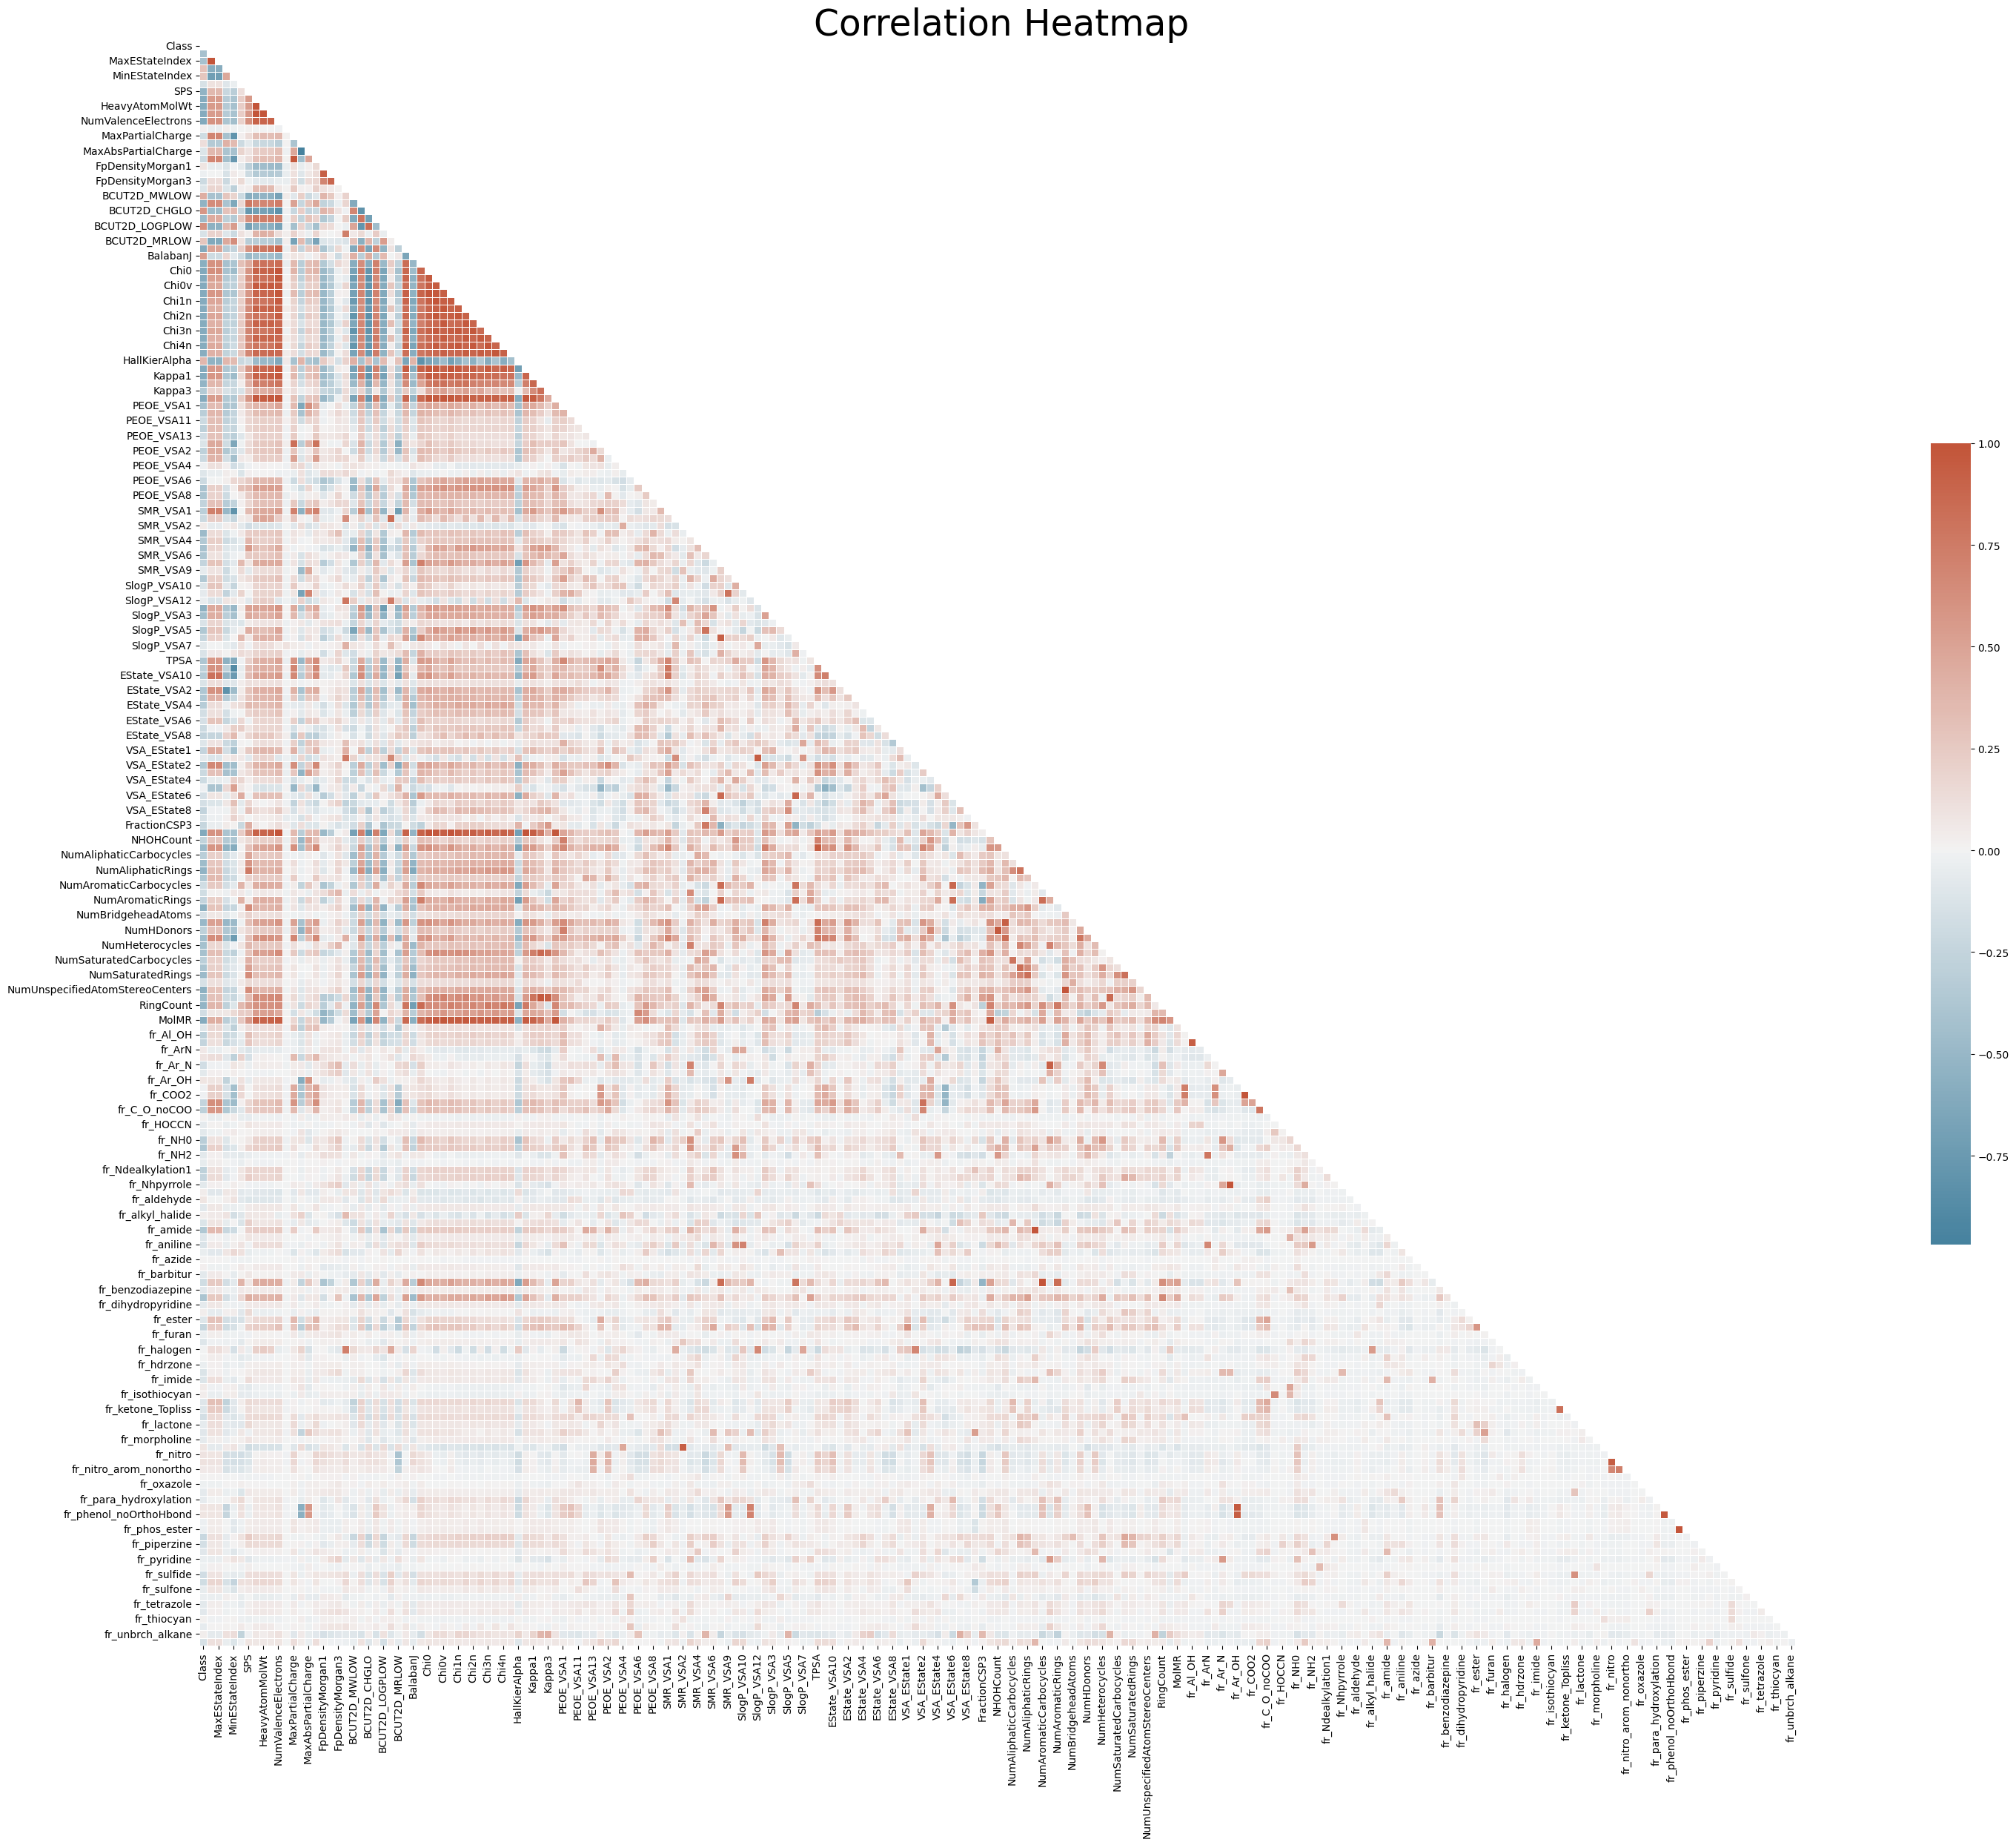

In [52]:
f,ax = plt.subplots(figsize=(35, 25))

mat = df.drop("SMILES", axis=1).corr('spearman')
mask = np.triu(np.ones_like(mat,dtype=bool))
cmap = sns.diverging_palette(230,20,as_cmap=True)

sns.heatmap(mat,mask=mask,cmap=cmap,vmax=1,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5})

plt.title('Correlation Heatmap',fontsize=35)

plt.tight_layout()

plt.show()

In [54]:
corr_matrix = df.drop("SMILES", axis=1).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

df.drop(to_drop, axis=1, inplace=True)

In [56]:
df.shape

(5220, 169)

In [59]:
df

,SMILES,Class,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,NumRadicalElectrons,MaxPartialCharge,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC#CC,1,2.680556,1.819444,1.819444,0.362198,3.500000,54.092,0,-0.002714,...,0,0,0,0,0,0,0,0,0,0
1,CCC=C,1,3.479167,1.083333,1.083333,0.399987,6.250000,56.108,0,-0.038200,...,0,0,0,0,0,0,0,0,0,0
2,O=CC=O,1,8.805556,0.194444,0.194444,0.297340,5.000000,58.036,0,0.181980,...,0,0,0,0,0,0,0,0,0,0
3,CCC=O,1,9.173611,0.638889,0.638889,0.403260,6.250000,58.080,0,0.119215,...,0,0,0,0,0,0,0,0,0,0
4,FCC#N,1,10.361111,0.875000,-0.875000,0.397829,5.000000,59.043,0,0.175641,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,CC1OC(CC(O)C1O)OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C...,0,12.568397,0.020300,-1.012485,0.162215,55.545455,780.949,0,0.330663,...,0,0,0,0,0,0,0,0,0,0
5216,CC1OC(CC(O)C1O)OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C...,0,12.568397,0.045206,-1.012485,0.162215,55.545455,780.949,0,0.330661,...,0,0,0,0,0,0,0,0,0,0
5217,CN(C(=O)C)c1c(I)c(NC(=O)C)c(I)c(C(=O)NC(C=O)C(...,0,13.113247,0.022882,-1.910232,0.147617,14.687500,789.099,0,0.253761,...,0,0,0,0,0,0,0,0,0,0
5218,CC(=O)N(CC(O)CO)c1c(I)c(C(=O)NCCO)c(I)c(C(=O)N...,0,12.949494,0.031563,-1.256091,0.139865,12.781250,791.115,0,0.253135,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [65]:
inf_cols = []
for col in df.drop(["SMILES"], axis=1).columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        if np.isinf(df[col]).any():
            inf_cols.append(col)
print("Столбцы с inf/-inf:", inf_cols)

Столбцы с inf/-inf: ['MaxPartialCharge']


In [64]:
df.drop(["SMILES"], axis=1).dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [69]:
df

,SMILES,Class,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,NumRadicalElectrons,MaxPartialCharge,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC#CC,1,2.680556,1.819444,1.819444,0.362198,3.500000,54.092,0,-0.002714,...,0,0,0,0,0,0,0,0,0,0
1,CCC=C,1,3.479167,1.083333,1.083333,0.399987,6.250000,56.108,0,-0.038200,...,0,0,0,0,0,0,0,0,0,0
2,O=CC=O,1,8.805556,0.194444,0.194444,0.297340,5.000000,58.036,0,0.181980,...,0,0,0,0,0,0,0,0,0,0
3,CCC=O,1,9.173611,0.638889,0.638889,0.403260,6.250000,58.080,0,0.119215,...,0,0,0,0,0,0,0,0,0,0
4,FCC#N,1,10.361111,0.875000,-0.875000,0.397829,5.000000,59.043,0,0.175641,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,CC1OC(CC(O)C1O)OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C...,0,12.568397,0.020300,-1.012485,0.162215,55.545455,780.949,0,0.330663,...,0,0,0,0,0,0,0,0,0,0
5216,CC1OC(CC(O)C1O)OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C...,0,12.568397,0.045206,-1.012485,0.162215,55.545455,780.949,0,0.330661,...,0,0,0,0,0,0,0,0,0,0
5217,CN(C(=O)C)c1c(I)c(NC(=O)C)c(I)c(C(=O)NC(C=O)C(...,0,13.113247,0.022882,-1.910232,0.147617,14.687500,789.099,0,0.253761,...,0,0,0,0,0,0,0,0,0,0
5218,CC(=O)N(CC(O)CO)c1c(I)c(C(=O)NCCO)c(I)c(C(=O)N...,0,12.949494,0.031563,-1.256091,0.139865,12.781250,791.115,0,0.253135,...,0,0,0,0,0,0,0,0,0,0


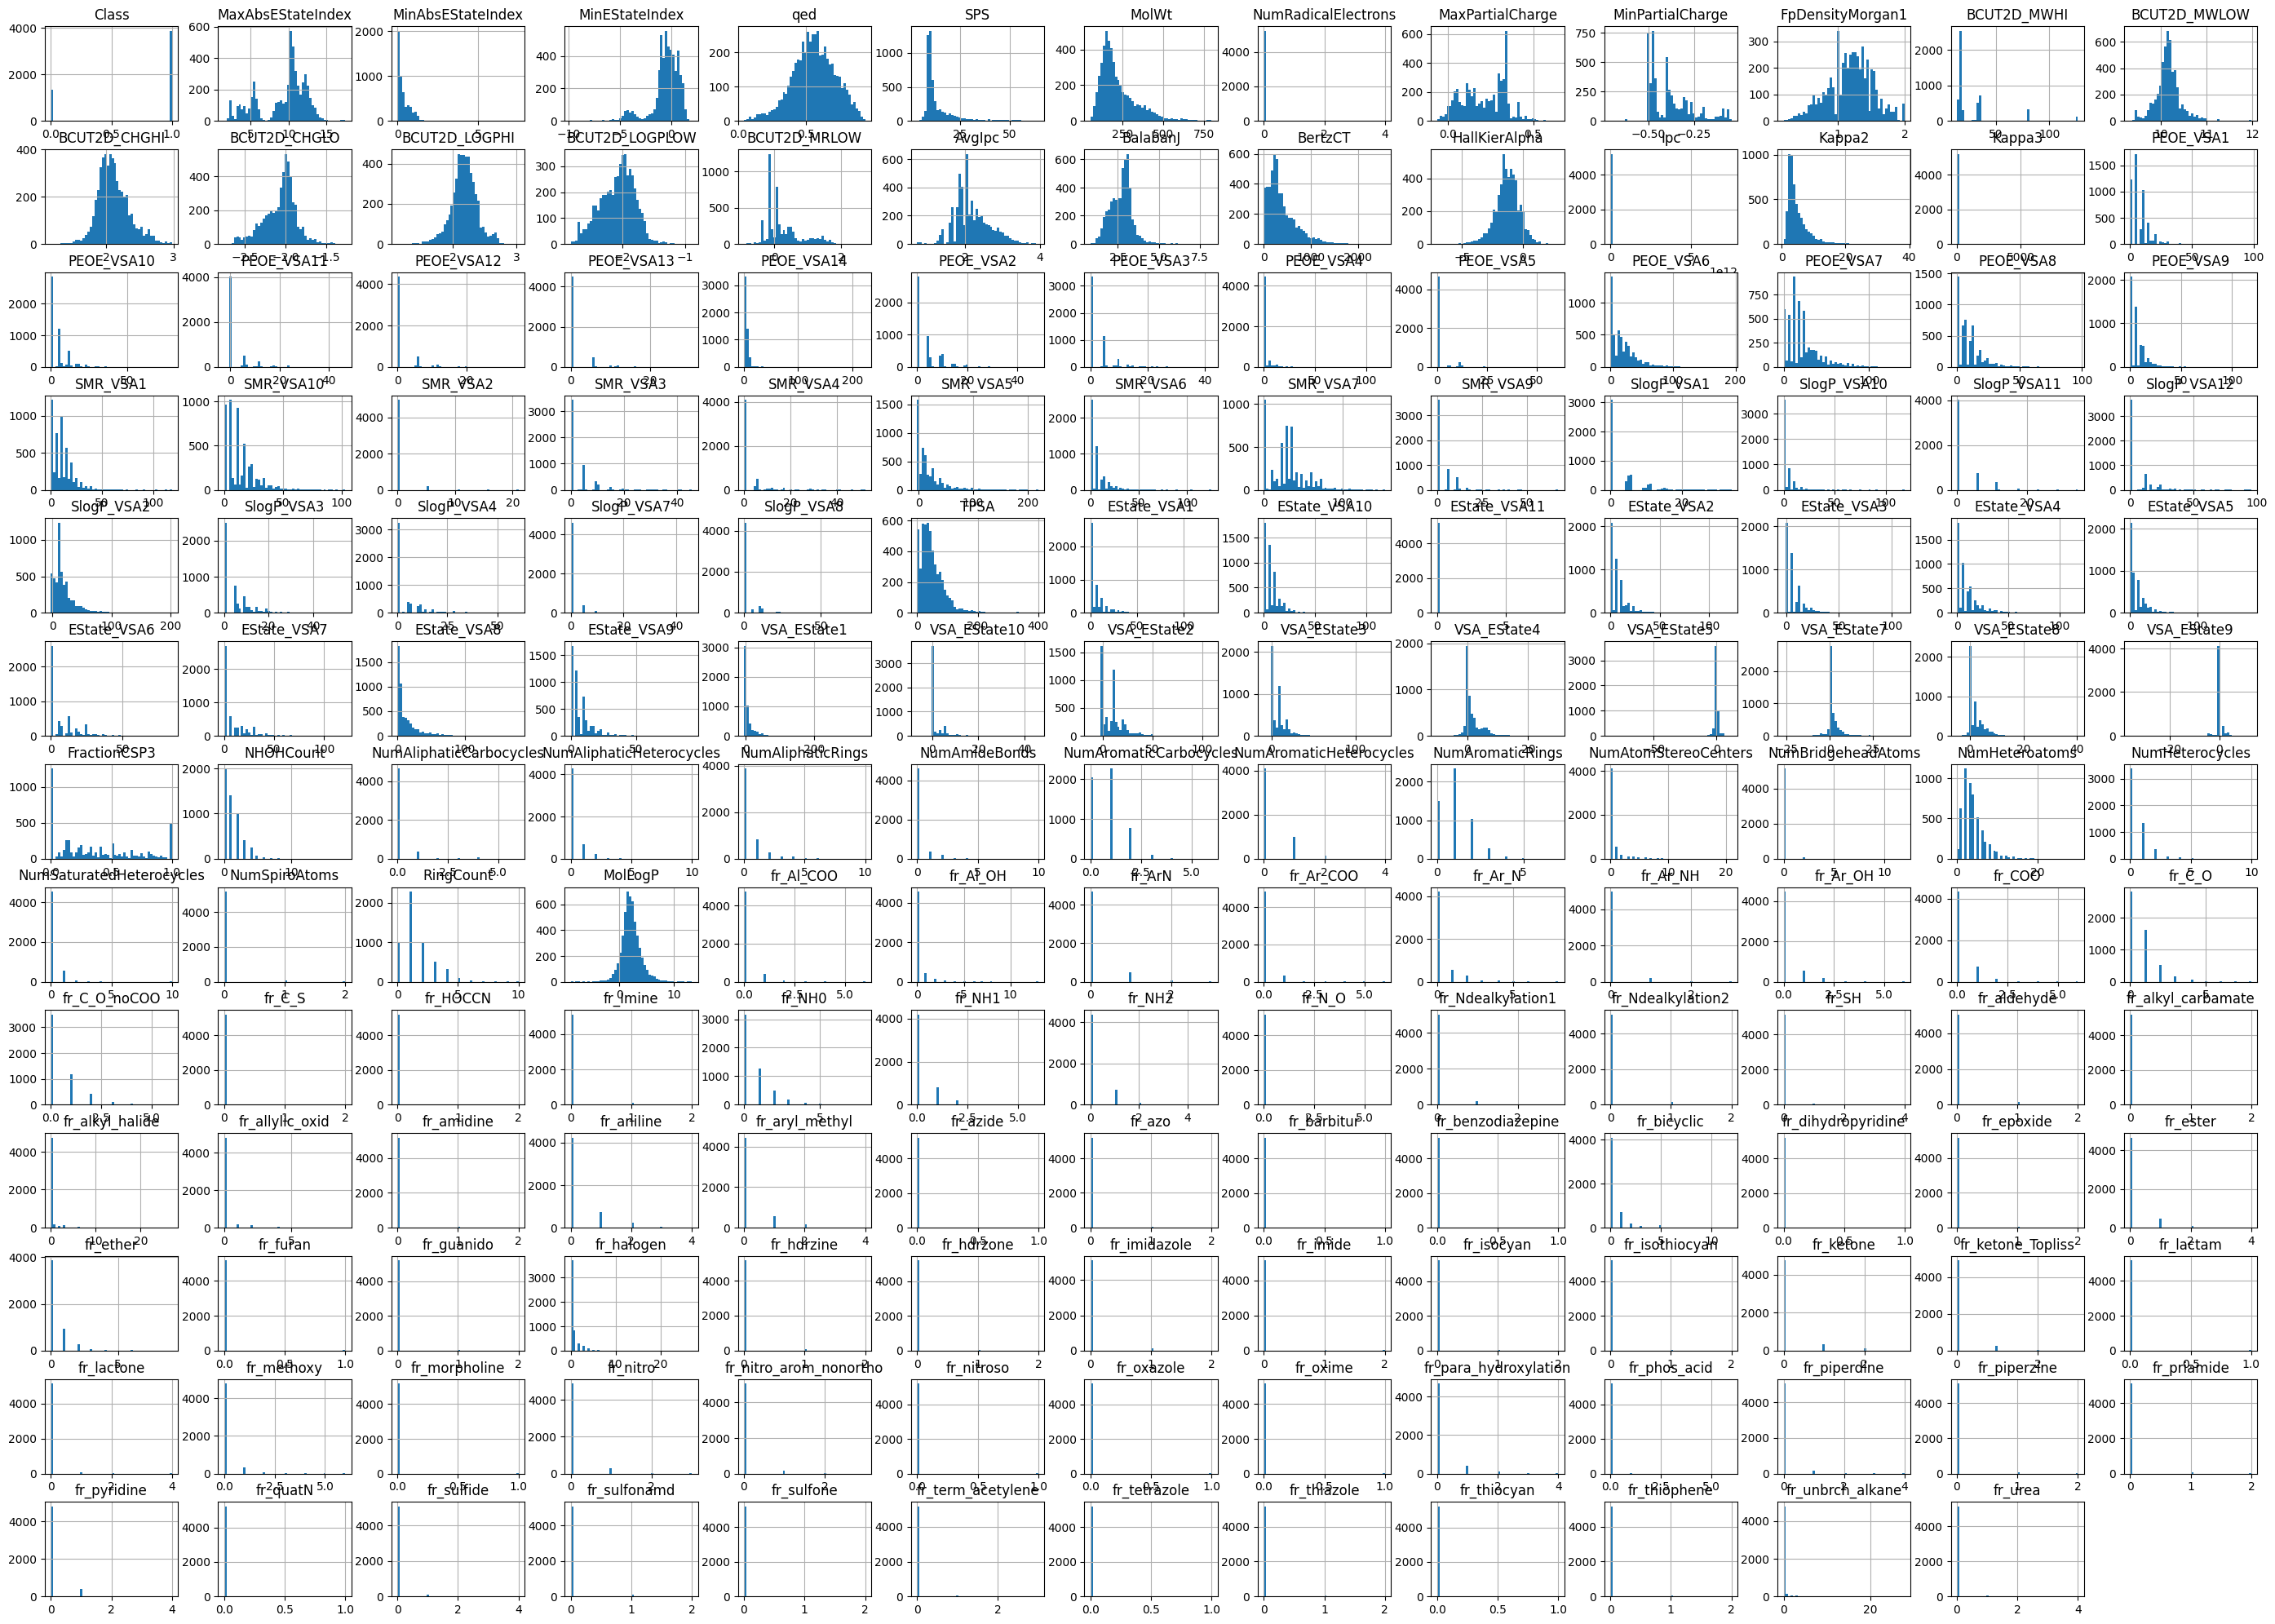

In [68]:
df.drop(["SMILES"], axis=1).hist(figsize = (35,25), bins = 50)
plt.show()

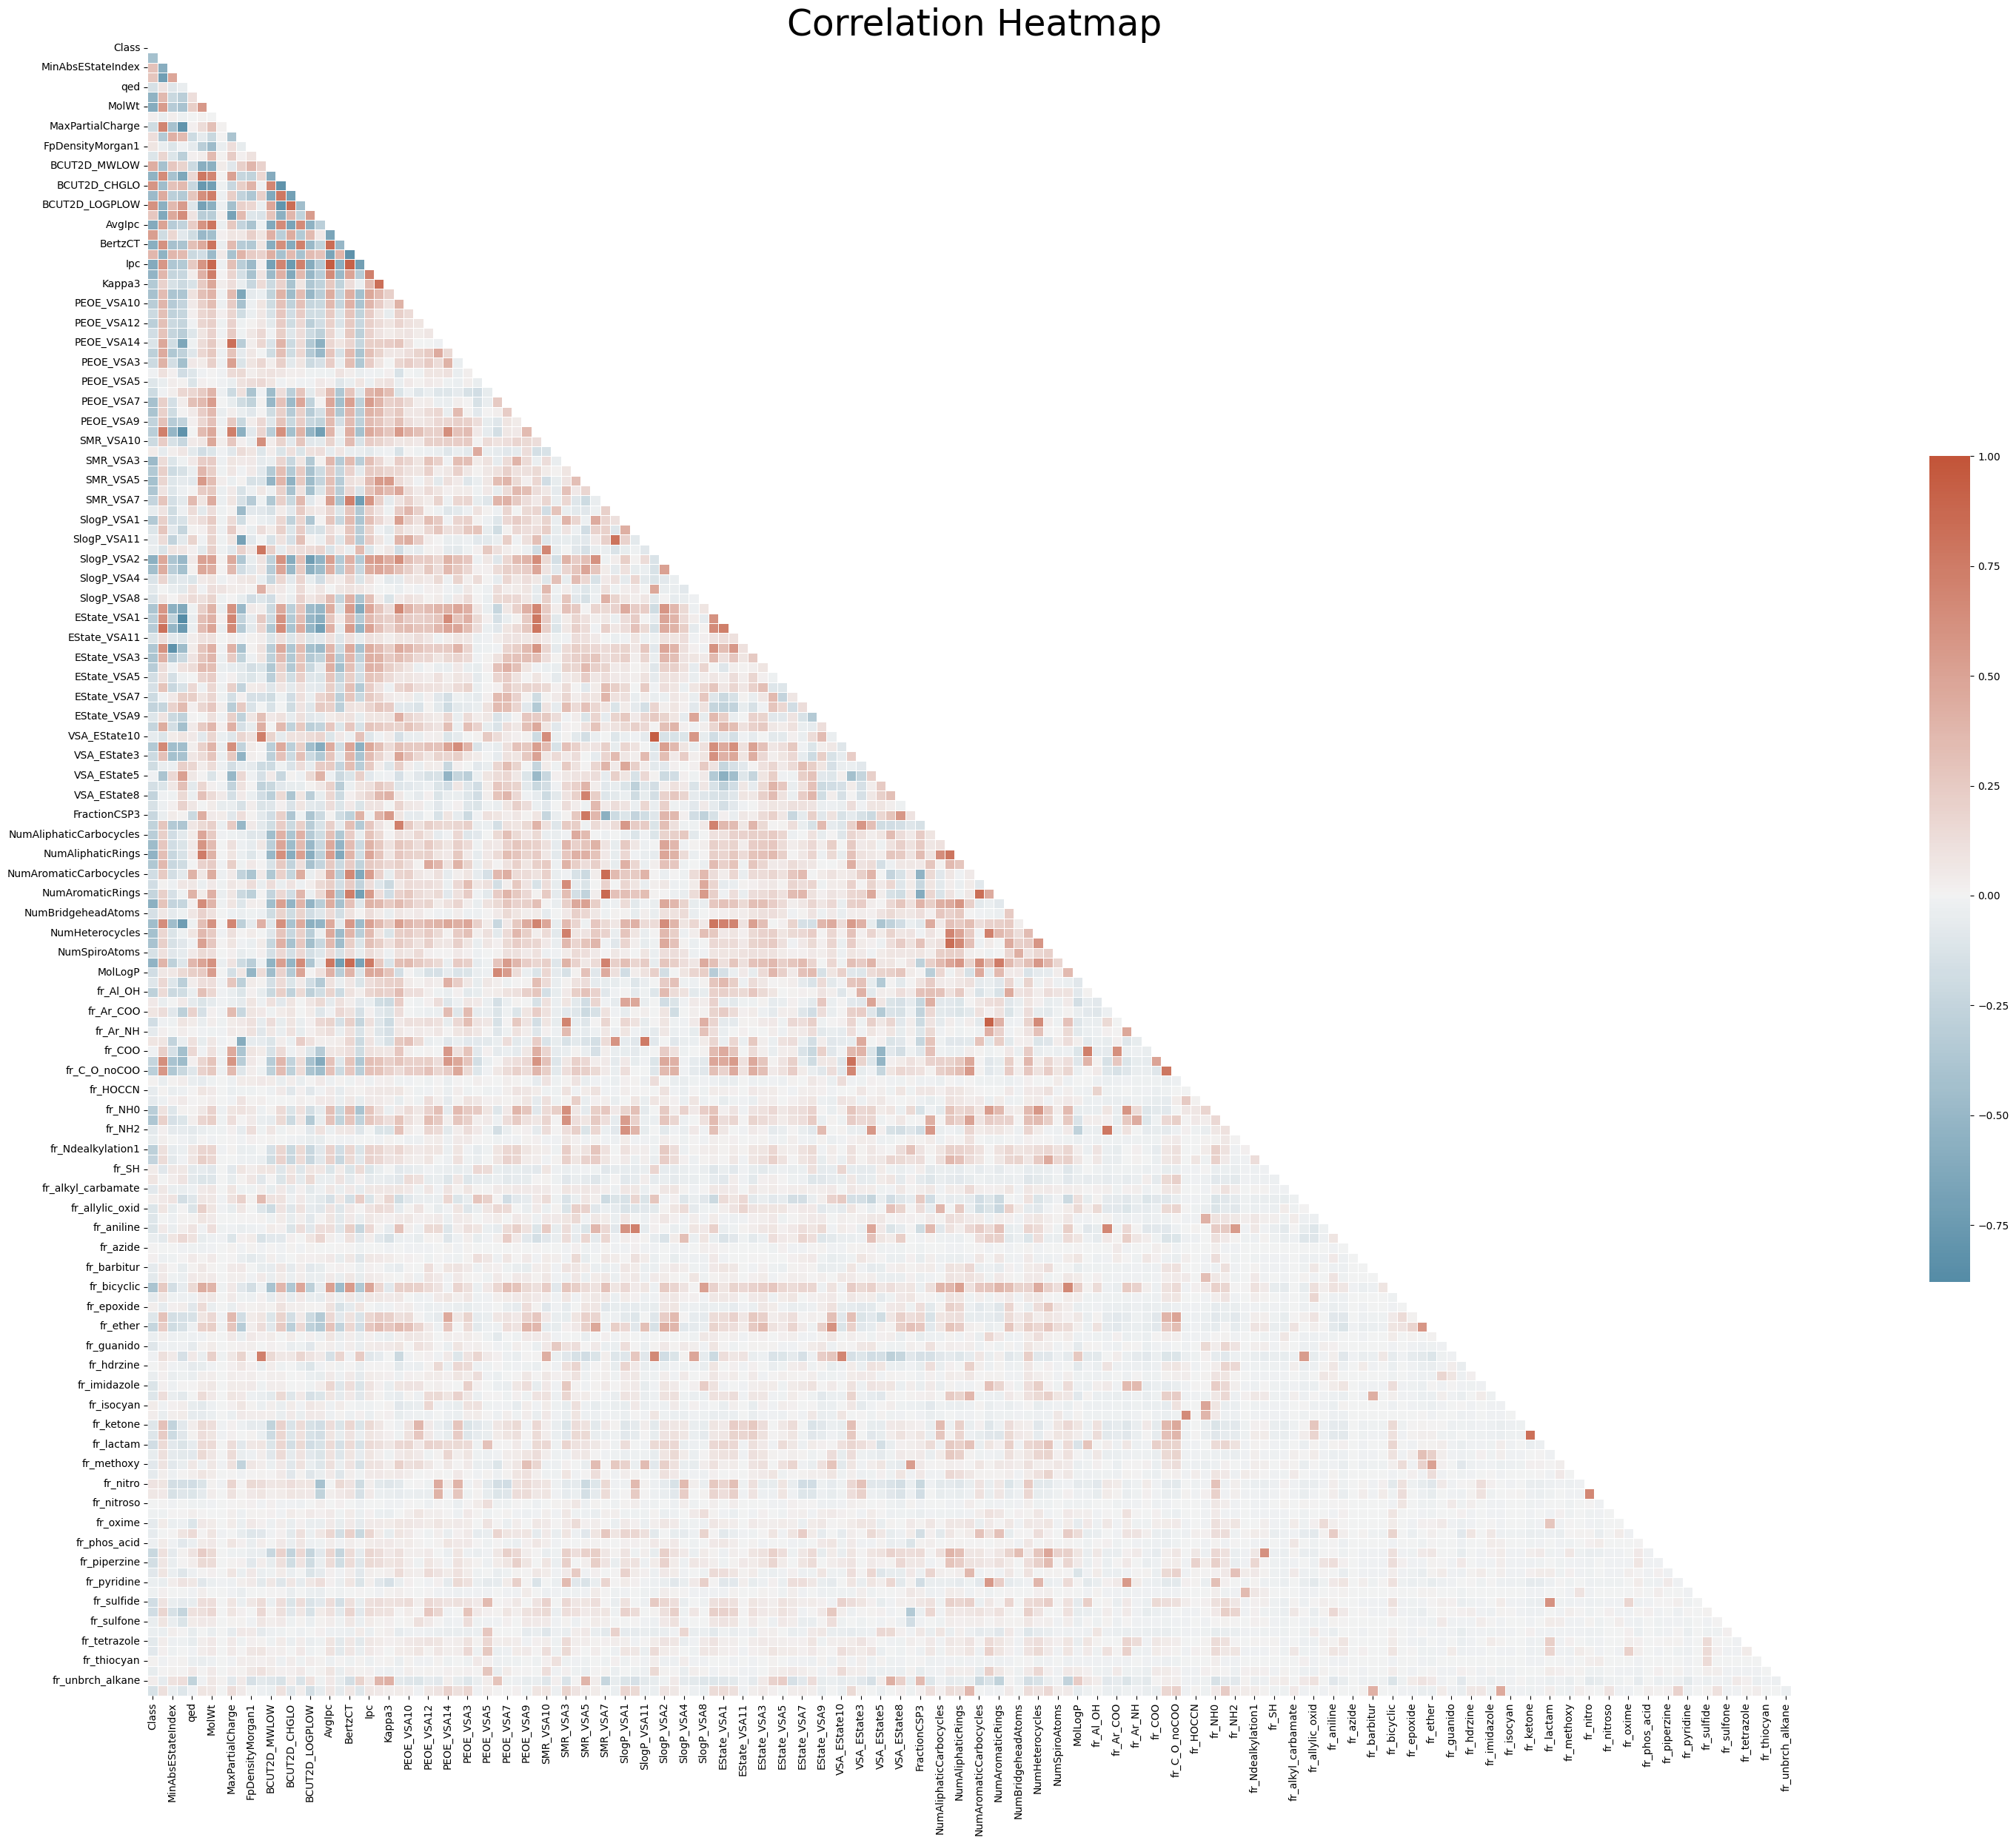

In [71]:
f,ax = plt.subplots(figsize=(35, 25))

mat = df.drop("SMILES", axis=1).corr('spearman')
mask = np.triu(np.ones_like(mat,dtype=bool))
cmap = sns.diverging_palette(230,20,as_cmap=True)

sns.heatmap(mat,mask=mask,cmap=cmap,vmax=1,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5})

plt.title('Correlation Heatmap',fontsize=35)

plt.tight_layout()

plt.show()

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [133]:
from sklearn import svm

In [128]:
df["Class"].value_counts()

,count
Class,
1,3874
0,1346


In [148]:
X = df.drop(["SMILES", "Class"], axis=1)

In [149]:
y = df["Class"]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, shuffle=True)

In [156]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(class_weight='balanced')

In [157]:
y_pred = clf.predict(X_test)

In [158]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7452118398142774


In [159]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04       448
           1       0.74      1.00      0.85      1275

    accuracy                           0.75      1723
   macro avg       0.87      0.51      0.45      1723
weighted avg       0.81      0.75      0.64      1723



In [160]:
from sklearn.linear_model import LogisticRegression

In [161]:
logreg = LogisticRegression(random_state=42)

In [163]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [165]:
y_pred = logreg.predict(X_test)

In [166]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.34      0.42       448
           1       0.80      0.91      0.85      1275

    accuracy                           0.76      1723
   macro avg       0.68      0.62      0.63      1723
weighted avg       0.73      0.76      0.74      1723



In [167]:
from sklearn.tree import DecisionTreeClassifier

In [168]:
tree = DecisionTreeClassifier(random_state=42)

In [169]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [170]:
y_pred = tree.predict(X_test)

In [171]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       448
           1       0.93      0.95      0.94      1275

    accuracy                           0.91      1723
   macro avg       0.89      0.88      0.88      1723
weighted avg       0.91      0.91      0.91      1723



In [172]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
forest = RandomForestClassifier(random_state=42)

In [175]:
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [176]:
y_pred = forest.predict(X_test)

In [177]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       448
           1       0.94      0.97      0.96      1275

    accuracy                           0.94      1723
   macro avg       0.93      0.91      0.92      1723
weighted avg       0.94      0.94      0.94      1723

